#Transfer learning to create MusaNet CNN

MusaNet is CNN model able to detect 2 plant diseases in bananas, Sigatoka, Cordana leaf spot and good leaves or in good conditions. So "MusaNet" constant with 3 output neurons. 

The present notebook was created by two students:

* Daniel José Centeno González
* Arnoldo Javier Trujillo Robelo

From "La Salle Technological University", León, Nicaragua.

In this notebook you can found all the process that we did to train "MusaNet"

In [ ]:
#Import all the libreries 
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from keras.metrics import categorical_crossentropy
from keras.layers.core import Dense, Activation
from keras.applications import imagenet_utils
from tensorflow.keras.optimizers import Adam 
from keras.preprocessing import image
from IPython.display import Image
from keras import backend as K
from keras.models import Model
import matplotlib.pylab as plt
import tensorflow_hub as hub
import tensorflow as tf
from io import BytesIO
from PIL import Image
import numpy as np
import requests
import keras
import cv2

We shall be using Mobilenet V2 as it is lightweight and faster than other models 

<img src="https://storage.googleapis.com/gweb-cloudblog-publish/images/mnasnet_vs_mobilenetv2.max-1800x1800.png">

<img src="https://2.bp.blogspot.com/-E7CT0RHBWq4/WsKlTgEeX2I/AAAAAAAACh0/dp1B4yh6O2k4H1LuC7BA-EKzrL7W0L8iACLcBGAs/s1600/image2.png">



In [ ]:
#Request a better graphic card 
!nvidia-smi

Mon Jul 11 03:21:57 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#Conect with google drive where is the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Data augmentation, create a dataset generador
datagen = ImageDataGenerator(rescale=1. / 255, rotation_range = 30,
    width_shift_range = 0.25, height_shift_range = 0.25,
    shear_range = 15, zoom_range = [0.5, 1.5]
)


In [ ]:
#Generator of training set with a size of 224x224
train_generator=datagen.flow_from_directory('/content/drive/MyDrive/Paper_V2/DataSet2/Train_set',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 382 images belonging to 3 classes.


In [ ]:
#Generator of test set with a size of 224x224
test_generator = datagen.flow_from_directory('/content/drive/MyDrive/Paper_V2/DataSet2/Test_set',
                                            target_size = (224, 224),
                                            color_mode = 'rgb',
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            shuffle=True)


Found 96 images belonging to 3 classes.


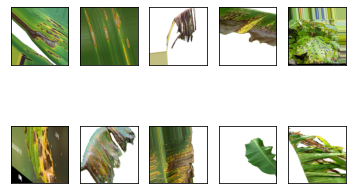

In [ ]:
#Print 10 imagenes with the augmentation of data 

for imagen, etiqueta in train_generator:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()

In [ ]:
#Download Mobilenet V2 model
mobilenet_v2 = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [ ]:
#Indicate the type of input network 
musa_net_layers = hub.KerasLayer(mobilenet_v2, input_shape=(224,224,3))

In [ ]:
#Frozen the download model 
musa_net_layers.trainable = False

In [ ]:
#Create a sequential model with 3 out dense neurons with softmax activation  
musa_net = tf.keras.Sequential([
  musa_net_layers,
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(3,activation='softmax')
])

In [ ]:
#Show a summary of the model
musa_net.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 3)                 3843      
                                                                 
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
#Define optimizer SGD 
opt = tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.0, nesterov=False, name="SGD")

In [ ]:
#Train model
# SGD optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy
musa_net.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
History = musa_net.fit(train_generator, epochs=10, validation_data=test_generator)  

Epoch 1/10
12/12 [==============================] - 552s 46s/step - loss: 1.2063 - accuracy: 0.4607 - val_loss: 0.9994 - val_accuracy: 0.5521
Epoch 2/10
12/12 [==============================] - 159s 13s/step - loss: 0.9768 - accuracy: 0.5628 - val_loss: 0.8491 - val_accuracy: 0.6042
Epoch 3/10
12/12 [==============================] - 155s 13s/step - loss: 0.7958 - accuracy: 0.6518 - val_loss: 0.6792 - val_accuracy: 0.7188
Epoch 4/10
12/12 [==============================] - 153s 13s/step - loss: 0.7726 - accuracy: 0.6675 - val_loss: 0.6770 - val_accuracy: 0.7500
Epoch 5/10
12/12 [==============================] - 153s 13s/step - loss: 0.7447 - accuracy: 0.6885 - val_loss: 0.6985 - val_accuracy: 0.6979
Epoch 6/10
12/12 [==============================] - 153s 13s/step - loss: 0.6525 - accuracy: 0.7199 - val_loss: 0.8013 - val_accuracy: 0.6562
Epoch 7/10
12/12 [==============================] - 152s 13s/step - loss: 0.6571 - accuracy: 0.7592 - val_loss: 0.7145 - val_accuracy: 0.6458
Epoch 

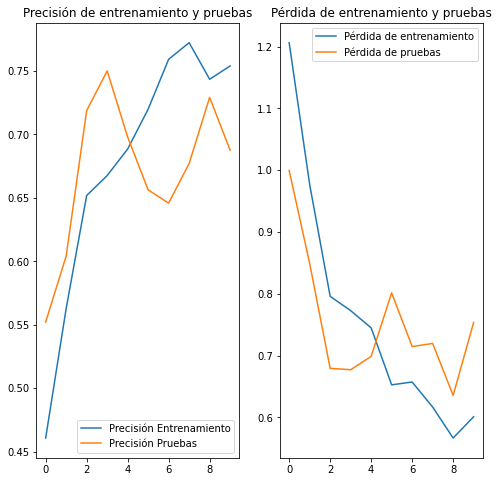

In [ ]:
#Show plot graphs
acc = History.history['accuracy']
val_acc = History.history['val_accuracy']

loss = History.history['loss']
val_loss = History.history['val_loss']

rango_epocas = range(10)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

In [ ]:
#Funtion that take a image url and makes a prediction

def categorizar(url):
  respuesta = requests.get(url)
  img = Image.open(BytesIO(respuesta.content))
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  prediccion = musa_net.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediccion[0], axis=-1)

<img src="https://image.shutterstock.com/image-photo/green-banana-leaf-isolated-on-260nw-1719897532.jpg">


In [ ]:
#0 = Cepa Sana, 1 = Mancha foliar, 2 = Sigatoka
url = 'https://image.shutterstock.com/image-photo/green-banana-leaf-isolated-on-260nw-1719897532.jpg' #Es Hoja buena = 0
prediccion = categorizar (url)
print(prediccion)

0


<img src="https://docplayer.es/docs-images/86/93244368/images/5-1.jpg">

In [ ]:
#0 = Cepa Sana, 1 = Mancha foliar,  2 = Sigatoka
url = 'http://2.bp.blogspot.com/_X0EyxYFpEDM/S9Lv2JMZg6I/AAAAAAAABGA/6McMCvF3DqM/w1200-h630-p-k-no-nu/P4220071.JPG' #Es Mancha foliar = 1
prediccion = categorizar (url)
print(prediccion)

1


<img src="https://www.elindependiente.com/wp-content/uploads/2019/05/platenero-afectado-hongo.jpg">

In [ ]:
#0 = Cepa Sana, 1 = Mancha foliar,  2 = Sigatoka
url = 'https://www.elindependiente.com/wp-content/uploads/2019/05/platenero-afectado-hongo.jpg' #Es sigatoka = 2
prediccion = categorizar (url)
print(prediccion)

2


In [ ]:
#Crear la carpeta para exportarla a TF Serving
!mkdir -p carpeta_salida/ModeloCNN

In [ ]:
#Guardar el modelo en formato SavedModel
musa_net.save('carpeta_salida/ModeloCNN')

INFO:tensorflow:Assets written to: carpeta_salida/ModeloCNN/assets


INFO:tensorflow:Assets written to: carpeta_salida/ModeloCNN/assets


In [ ]:
#Hacerlo un zip para bajarlo y usarlo en otro lado
!zip -r musanet_CNN.zip /content/carpeta_salida/ModeloCNN/

  adding: content/carpeta_salida/ModeloCNN/ (stored 0%)
  adding: content/carpeta_salida/ModeloCNN/saved_model.pb (deflated 92%)
  adding: content/carpeta_salida/ModeloCNN/variables/ (stored 0%)
  adding: content/carpeta_salida/ModeloCNN/variables/variables.index (deflated 78%)
  adding: content/carpeta_salida/ModeloCNN/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/carpeta_salida/ModeloCNN/keras_metadata.pb (deflated 82%)
  adding: content/carpeta_salida/ModeloCNN/assets/ (stored 0%)
